In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Mount

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bollywood.csv")
print(df)

     SlNo Release Date                    MovieName ReleaseTime     Genre  \
0       1    18-Apr-14                     2 States          LW   Romance   
1       2     4-Jan-13                 Table No. 21           N  Thriller   
2       3    18-Jul-14           Amit Sahni Ki List           N    Comedy   
3       4     4-Jan-13             Rajdhani Express           N     Drama   
4       5     4-Jul-14                 Bobby Jasoos           N    Comedy   
..    ...          ...                          ...         ...       ...   
144   145    27-Feb-15           Dum Laga Ke Haisha           N    Comedy   
145   146    13-Mar-15                         NH10           N  Thriller   
146   147    20-Mar-15  Dilliwali Zaalim Girlfriend           N    Comedy   
147   148    20-Mar-15                     Hunterrr           N    Comedy   
148   149    23-May-14                Kochadaiiyaan          HS    Action   

     Budget  BoxOfficeCollection  YoutubeViews  YoutubeLikes  YoutubeDislik

In [35]:
# Clean column names
df.columns = [c.strip().replace(" ", "") for c in df.columns]

# Convert Release Date to datetime if present
if "ReleaseDate" in df.columns:
    df["ReleaseDate"] = pd.to_datetime(df["ReleaseDate"], errors="coerce", dayfirst=True)
    df["Month"] = df["ReleaseDate"].dt.month_name()

# Ensure numeric types
for col in ["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Calculate ROI
df["ROI"] = (df["BoxOfficeCollection"] - df["Budget"]) / df["Budget"]

/tmp/ipython-input-3834915799.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ReleaseDate"] = pd.to_datetime(df["ReleaseDate"], errors="coerce", dayfirst=True)


In [36]:
# Q1
print("Q1. Number of records:", len(df))
print("\nMetadata:")
print(df.info())

Q1. Number of records: 149

Metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SlNo                 149 non-null    int64         
 1   ReleaseDate          149 non-null    datetime64[ns]
 2   MovieName            149 non-null    object        
 3   ReleaseTime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    int64         
 6   BoxOfficeCollection  149 non-null    float64       
 7   YoutubeViews         149 non-null    int64         
 8   YoutubeLikes         149 non-null    int64         
 9   YoutubeDislikes      149 non-null    int64         
 10  Month                149 non-null    object        
 11  ROI                  149 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)


In [37]:
# Q2
print("\nQ2. Releases per Genre:")
print(df["Genre"].value_counts())


Q2. Releases per Genre:
Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64


In [38]:
# Q3
print("\nQ3. Cross-tab Genre x ReleaseTime:")
print(pd.crosstab(df["Genre"], df["ReleaseTime"]))


Q3. Cross-tab Genre x ReleaseTime:
ReleaseTime  FS  HS  LW   N
Genre                      
Action        3   3   3  15
Comedy        3   5   5  23
Drama         4   6   1  24
Romance       3   3   4  15
Thriller      4   1   2  22


In [39]:
# Q4
if "Month" in df.columns:
    print("\nQ4. Month with maximum releases:")
    print(df["Month"].value_counts())


Q4. Month with maximum releases:
Month
January      20
March        19
May          18
July         16
February     16
April        11
June         10
September    10
November     10
October       9
August        8
December      2
Name: count, dtype: int64


In [40]:
# Q5
if "Month" in df.columns:
    high_budget = df[df["Budget"] >= 25]
    print("\nQ5. High budget releases per month:")
    print(high_budget["Month"].value_counts())


Q5. High budget releases per month:
Month
February     9
January      8
August       7
March        7
November     6
July         6
June         5
September    5
April        4
October      4
May          3
December     2
Name: count, dtype: int64


In [41]:
# Q6
print("\nQ6. Top 10 movies by ROI:")
print(df[["MovieName","ROI"]].sort_values("ROI", ascending=False).head(10))


Q6. Top 10 movies by ROI:
                     MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667


In [42]:
# Q7
print("\nQ7. Average ROI by ReleaseTime:")
print(df.groupby("ReleaseTime")["ROI"].mean())


Q7. Average ROI by ReleaseTime:
ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64


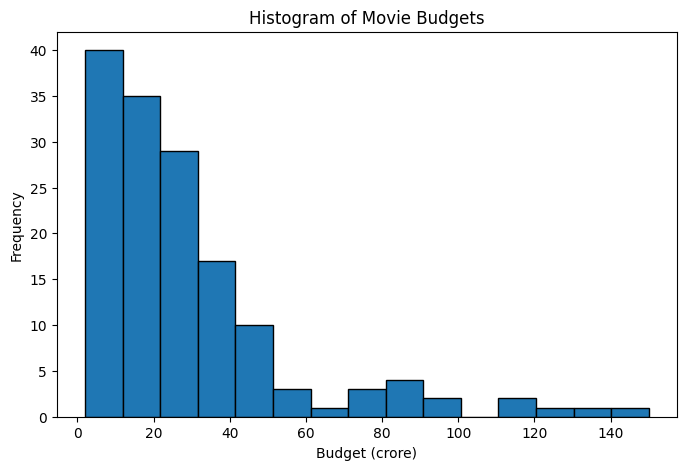

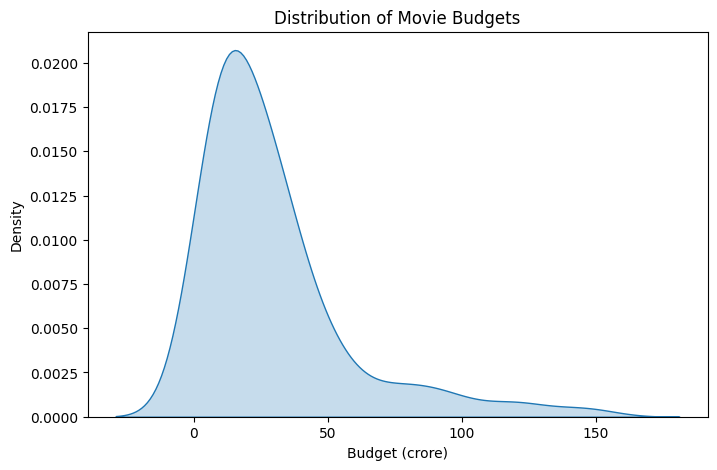

In [43]:
# Q8
plt.figure(figsize=(8,5))
plt.hist(df["Budget"].dropna(), bins=15, edgecolor="black")
plt.title("Histogram of Movie Budgets")
plt.xlabel("Budget (crore)")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8,5))
sns.kdeplot(df["Budget"].dropna(), fill=True)
plt.title("Distribution of Movie Budgets")
plt.xlabel("Budget (crore)")
plt.show()

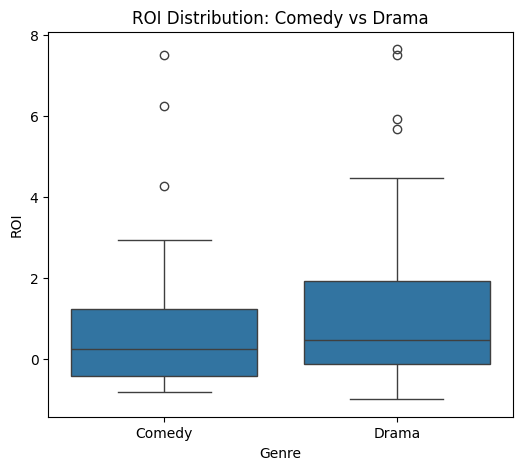

In [44]:
# Q9
plt.figure(figsize=(6,5))
sns.boxplot(x="Genre", y="ROI", data=df[df["Genre"].isin(["Comedy","Drama"])] )
plt.title("ROI Distribution: Comedy vs Drama")
plt.show()


Q10. Correlation between BoxOfficeCollection and YoutubeLikes:
                     BoxOfficeCollection  YoutubeLikes
BoxOfficeCollection             1.000000      0.682517
YoutubeLikes                    0.682517      1.000000


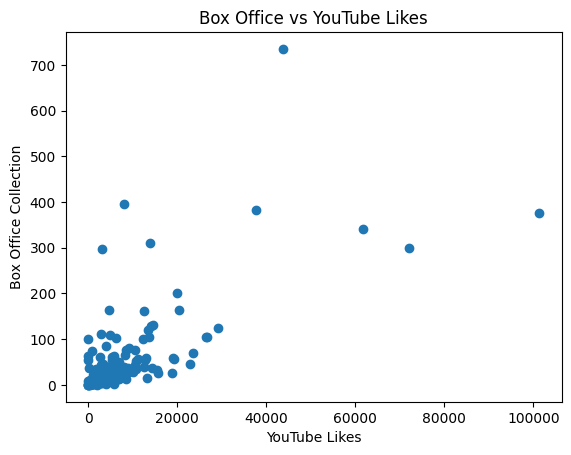

In [45]:
# Q10
print("\nQ10. Correlation between BoxOfficeCollection and YoutubeLikes:")
print(df[["BoxOfficeCollection","YoutubeLikes"]].corr())


plt.scatter(df["YoutubeLikes"], df["BoxOfficeCollection"])
plt.xlabel("YouTube Likes")
plt.ylabel("Box Office Collection")
plt.title("Box Office vs YouTube Likes")
plt.show()

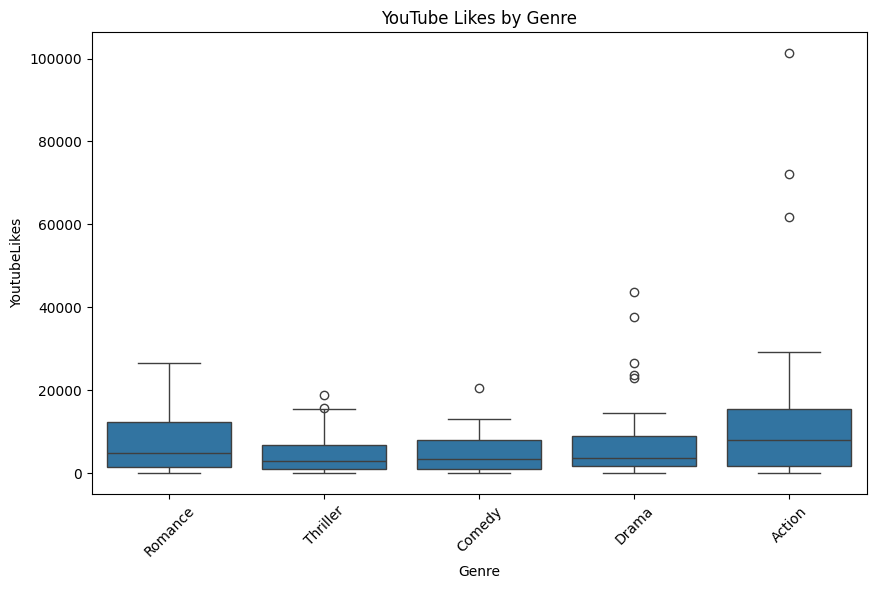

In [46]:
# Q11
plt.figure(figsize=(10,6))
sns.boxplot(x="Genre", y="YoutubeLikes", data=df)
plt.xticks(rotation=45)
plt.title("YouTube Likes by Genre")
plt.show()

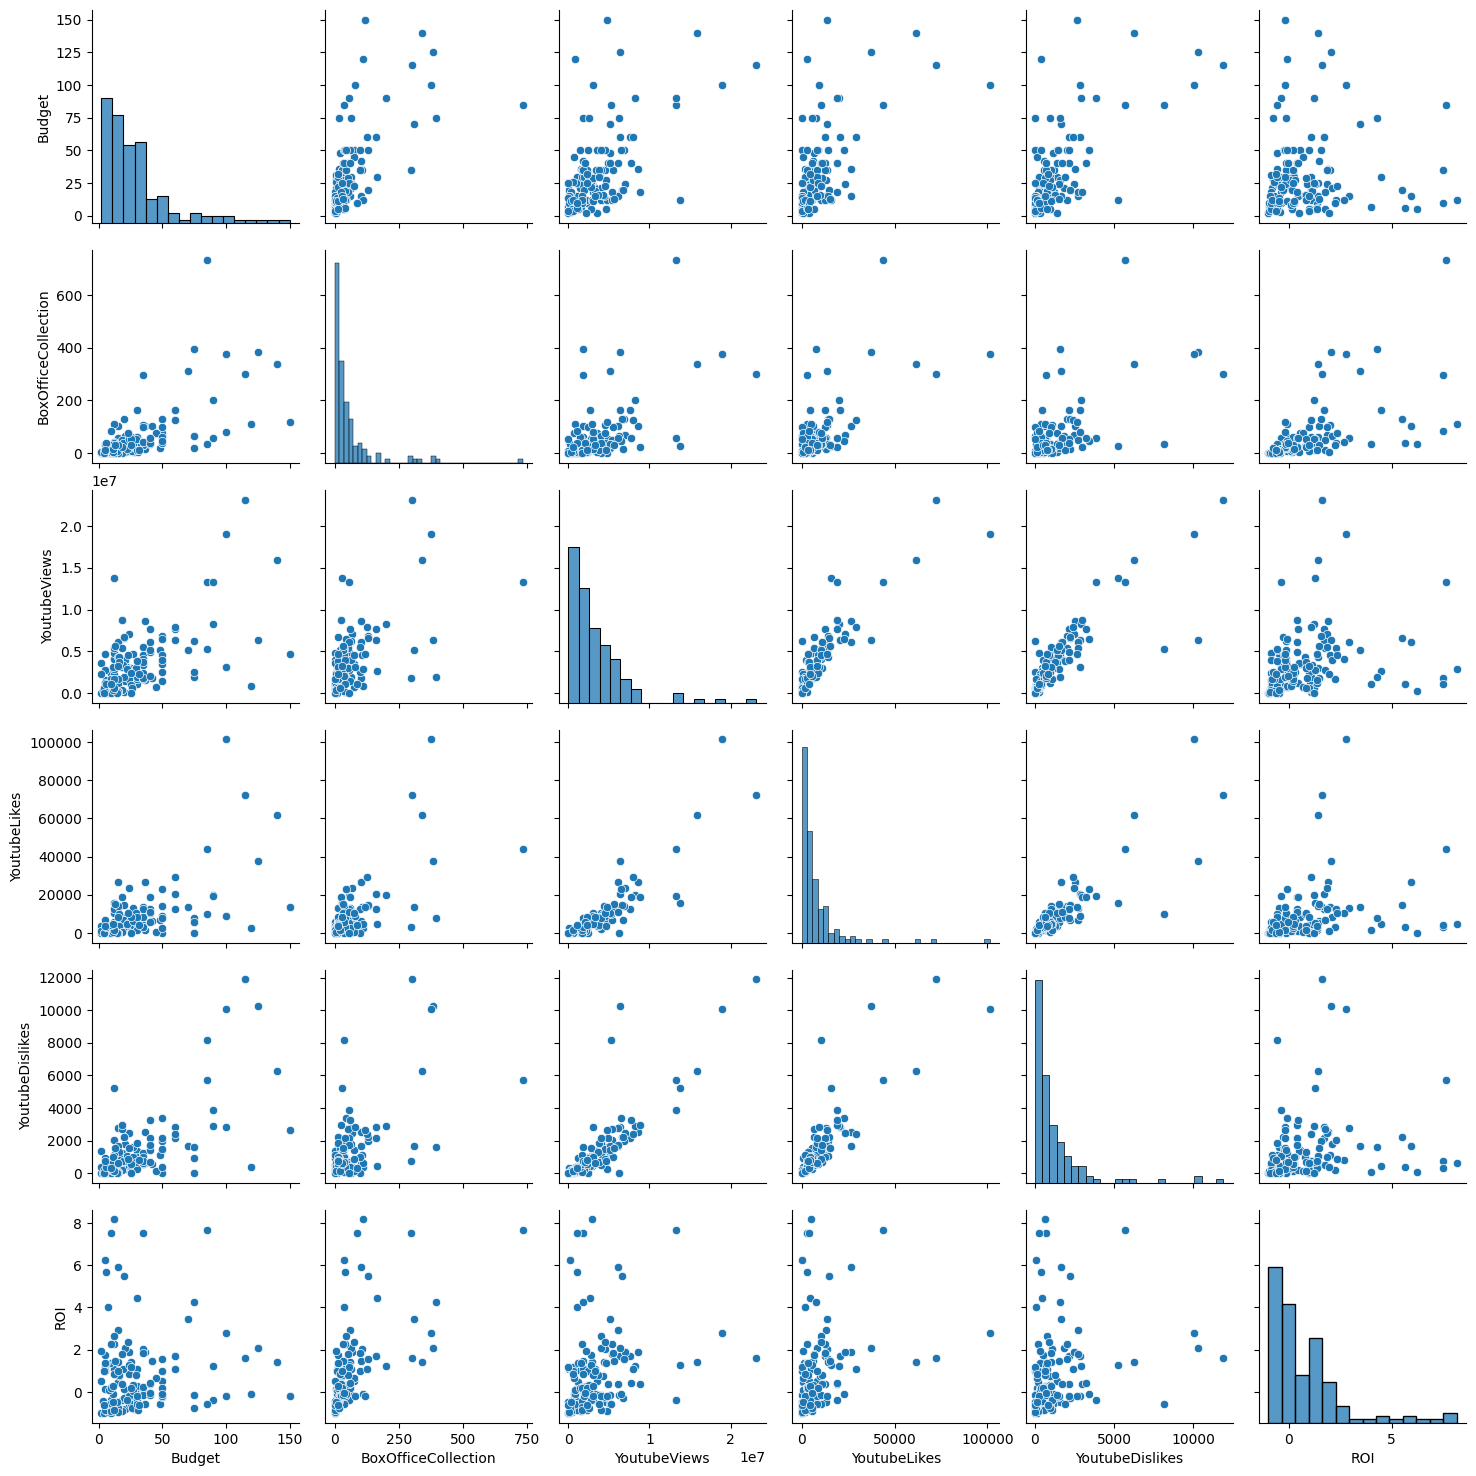


Q12. Correlation matrix:
                       Budget  BoxOfficeCollection  YoutubeViews  \
Budget               1.000000             0.650401      0.589038   
BoxOfficeCollection  0.650401             1.000000      0.588632   
YoutubeViews         0.589038             0.588632      1.000000   
YoutubeLikes         0.608916             0.682517      0.884055   
YoutubeDislikes      0.665343             0.623941      0.846739   
ROI                  0.072050             0.585042      0.252847   

                     YoutubeLikes  YoutubeDislikes       ROI  
Budget                   0.608916         0.665343  0.072050  
BoxOfficeCollection      0.682517         0.623941  0.585042  
YoutubeViews             0.884055         0.846739  0.252847  
YoutubeLikes             1.000000         0.859730  0.291302  
YoutubeDislikes          0.859730         1.000000  0.201533  
ROI                      0.291302         0.201533  1.000000  


In [49]:
# Q12
subset = df[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes","ROI"]]
sns.pairplot(subset.dropna())
plt.show()


print("\nQ12. Correlation matrix:")
print(subset.corr())